In [9]:
import kagglehub

# Download latest version
# path="hamzahabib47/brain-cancer-detection-mri-images"
path = kagglehub.dataset_download("hamzahabib47/brain-cancer-detection-mri-images")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/hamzahabib47/brain-cancer-detection-mri-images/versions/3


In [1]:
!pip install -Uqq fastai
from fastai.vision.all import *

In [10]:
from pathlib import Path

# Convert your directory to a Path object
path = Path(path)  # replace with your path

# Check if the directory exists and print its contents
if path.exists():
    print("Path exists.")
    print("Files in the directory:", list(path.iterdir()))  # Lists all files
else:
    print("Path does not exist.")


Path exists.
Files in the directory: [Path('/root/.cache/kagglehub/datasets/hamzahabib47/brain-cancer-detection-mri-images/versions/3/Dataset')]


In [11]:
get_image_files(path)

(#800) [Path('/root/.cache/kagglehub/datasets/hamzahabib47/brain-cancer-detection-mri-images/versions/3/Dataset/tumor/tumor (374).jpg'),Path('/root/.cache/kagglehub/datasets/hamzahabib47/brain-cancer-detection-mri-images/versions/3/Dataset/tumor/tumor (364).jpg'),Path('/root/.cache/kagglehub/datasets/hamzahabib47/brain-cancer-detection-mri-images/versions/3/Dataset/tumor/tumor (75).jpg'),Path('/root/.cache/kagglehub/datasets/hamzahabib47/brain-cancer-detection-mri-images/versions/3/Dataset/tumor/tumor (93).jpg'),Path('/root/.cache/kagglehub/datasets/hamzahabib47/brain-cancer-detection-mri-images/versions/3/Dataset/tumor/tumor (201).jpg'),Path('/root/.cache/kagglehub/datasets/hamzahabib47/brain-cancer-detection-mri-images/versions/3/Dataset/tumor/tumor (150).jpg'),Path('/root/.cache/kagglehub/datasets/hamzahabib47/brain-cancer-detection-mri-images/versions/3/Dataset/tumor/tumor (180).jpg'),Path('/root/.cache/kagglehub/datasets/hamzahabib47/brain-cancer-detection-mri-images/versions/3/Da

<Axes: >

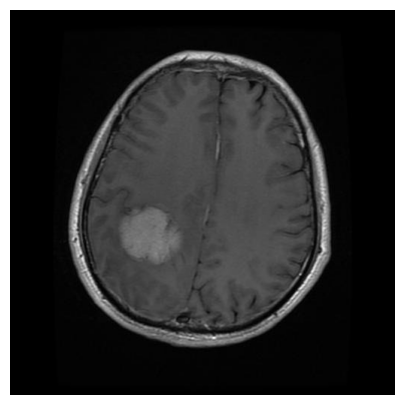

In [12]:
img=PILImage.create(get_image_files(path)[13])
img.show()

In [13]:
len(get_image_files(path))

800

In [14]:
label1='healthy'
label2='tumor'

In [15]:
for img in get_image_files(path):
  if label1 in str(img):
    img.rename(f"{img.parent}/{label1}_{img.name}")
  elif label2 in str(img):
    img.rename(f"{img.parent}/{label2}_{img.name}")
  else:os.remove(img) #removing the other images from the dataset
len(get_image_files(path))

800

In [16]:
def getlabel(fileName):
  return fileName.split('_')[0]

getlabel("health(1).jpg") #testing

'health(1).jpg'

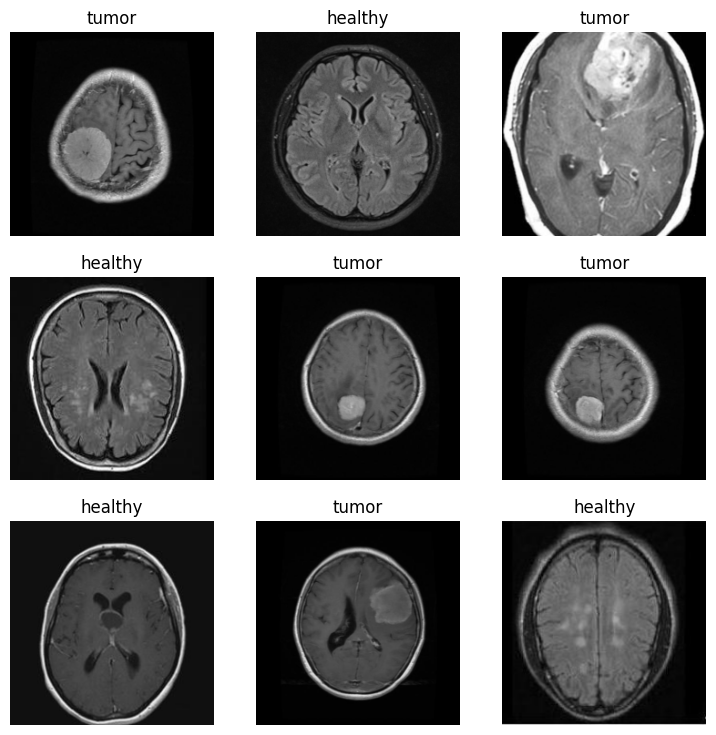

In [17]:
dls=ImageDataLoaders.from_name_func(
    path,get_image_files(path),valid_pct=0.2,seed=421,#0.2 is twenty percent of the data for testing
    label_func=getlabel,item_tfms=Resize(224)
)

dls.valid.show_batch()

In [18]:
learn=cnn_learner(dls,resnet34,metrics=error_rate,pretrained=True)
learn.fine_tune(epochs=10)

/usr/local/lib/python3.10/dist-packages/fastai/vision/learner.py:303: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 183MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,0.768111,0.566807,0.150000,00:06


epoch,train_loss,valid_loss,error_rate,time
0,0.201256,0.424194,0.125000,00:04
1,0.124079,0.261361,0.081250,00:05
2,0.086781,0.260860,0.056250,00:05
3,0.062519,0.195218,0.062500,00:04
4,0.046869,0.150587,0.050000,00:05
5,0.038782,0.204189,0.050000,00:04
6,0.029954,0.177811,0.056250,00:05
7,0.024006,0.162133,0.056250,00:06
8,0.020262,0.152372,0.056250,00:05
9,0.016393,0.148820,0.056250,00:09


Saving OIP (2).jpeg to OIP (2) (1).jpeg


This is a tumor
healthy0.999830
healthy0.000170


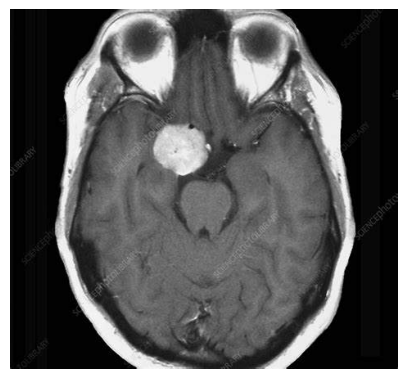

In [21]:
from google.colab import files
uploader=files.upload()
for img in uploader.items():
  uploadingImg=img[0]

img=PILImage.create(uploadingImg)
img.show()

label,_,probs=learn.predict(img)

print(f"This is a {label}")
print(f"{label1}{probs[1].item():6f}")
print(f"{label1}{probs[0].item():6f}")

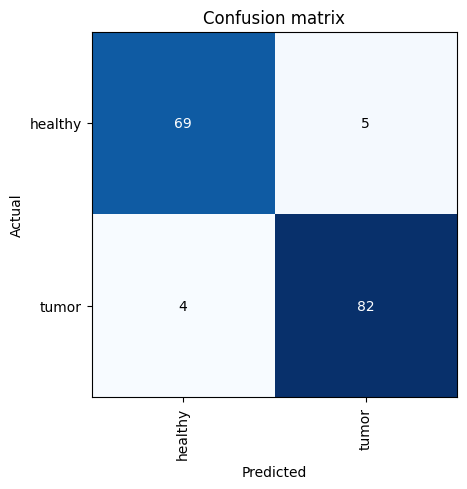

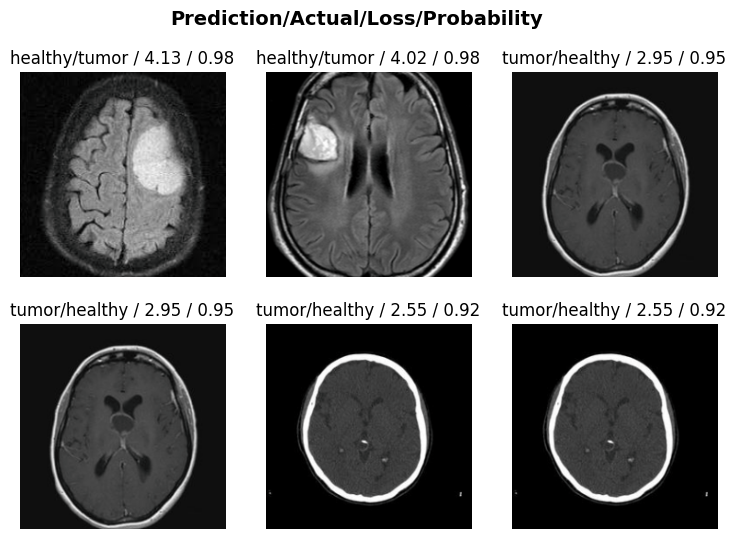

In [22]:
interp=ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()
interp.plot_top_losses(6)

In [23]:
learn.export()

In [24]:
modelPath=get_files(path,'.pkl')[0]
modelPath

Path('/root/.cache/kagglehub/datasets/hamzahabib47/brain-cancer-detection-mri-images/versions/3/export.pkl')

In [26]:
import matplotlib.image as mpimg

learn_inf=load_learner(modelPath)
learn_inf.predict(mpimg.imread(get_image_files(path)[0]))

('tumor', tensor(1), tensor([1.6186e-09, 1.0000e+00]))

In [27]:
learn_inf.dls.vocab

['healthy', 'tumor']

In [29]:
from google.colab import files
files.download(modelPath)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>